# Tutorials for LSTM
## Before starting
Please prepare virtual environments, such as venv, with Python 3.9.10. You can then install necessary libraries by running following commands.

```bash
pip install -e .
```

## Lunar surface topographic map generation
The goal of this notebook is to provide basic procedures to generate LSTM with descriptions about classes and parameters and some example maps. The map is given by `SurfaceModel` class with parametric setting by `CraterProp` and `Param` classes.

In [13]:
from env.utils import CraterProp, Param
from env.surface_model import SurfaceModel
import matplotlib.pyplot as plt # for visualization

1. Call `CraterProp`. Here, you can set how craters are distributed (*e.g.*, random distribution), geometric characteristics (*e.g.*, normal shape, central-mound shape), and their sizes.

In [14]:
crater_prop = CraterProp(
    distribution="random", # types of crater distribution in the map
    geometry="normal", # geometry characteristic
    min_D=1, # minimum crater range
    max_D=5, # maximum crater range
)

2. Call `Param`. Here, you can provide parameters for grid map, such as resolution and number of grids in each axis as well as for fractal terrain modeling, such as roughness exponent.

In [15]:
param = Param(
    n=200, # number of grid in one axis
    res=1, # grid resolution [m]
    re=0.8, # roughness exponent for fractal surface (0 < re < 1)
    sigma=5, # amplitude gain for fractal surface
    is_fractal=True, # choose to apply fractal surface
    is_crater=True, # choose to apply crater shape
    crater_prop=crater_prop # crater proporty denoted as "CraterProp" data structure
)

3. Call `SurfaceModel` and run `set_terrain_env()`. You can get terrain map and visualize it. 

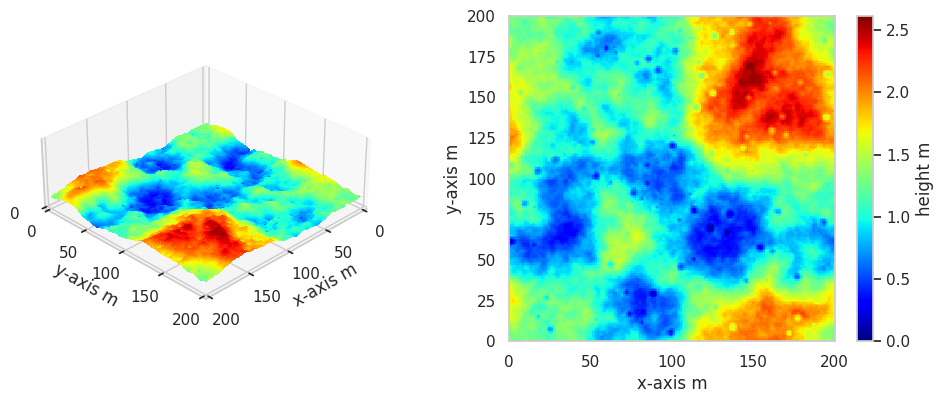

In [16]:
grid_map = SurfaceModel(param=param)
grid_map.set_terrain_env()

grid_map.plot_maps()
plt.show()

## Parameter Tuning Example

### 1. Single crater visualization - set `distribution="single"`.

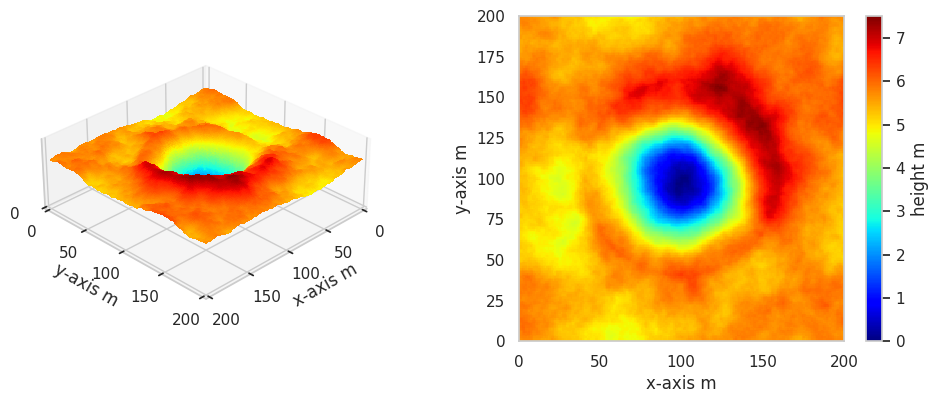

In [17]:
crater_prop = CraterProp(
    distribution="single", # types of crater distribution in the map
    geometry="normal", # geometry characteristic
    min_D=60, # minimum crater range
)

param = Param(
    n=200, # number of grid in one axis
    res=1, # grid resolution [m]
    re=0.8, # roughness exponent for fractal surface (0 < re < 1)
    sigma=5, # amplitude gain for fractal surface
    is_fractal=True, # choose to apply fractal surface
    is_crater=True, # choose to apply crater shape
    crater_prop=crater_prop # crater proporty denoted as "CraterProp" data structure
)

grid_map = SurfaceModel(param=param)
grid_map.set_terrain_env()

grid_map.plot_maps()
plt.show()

### 2. No crater visualization - set `is_crater=False`.

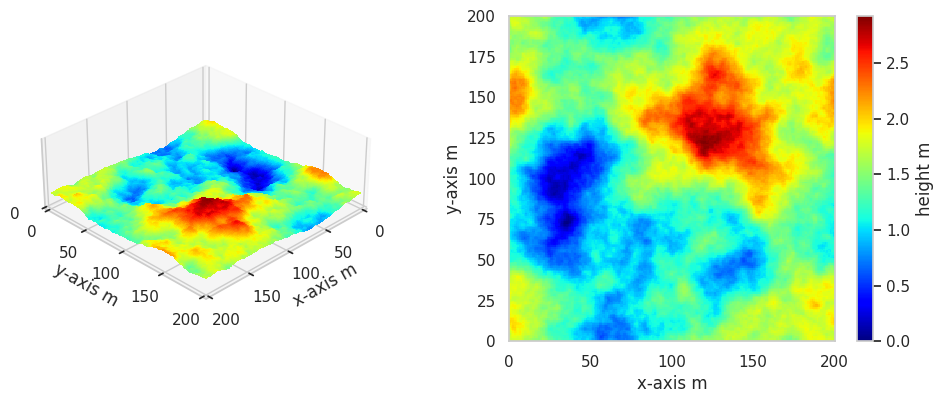

In [18]:
param = Param(
    n=200, # number of grid in one axis
    res=1, # grid resolution [m]
    re=0.8, # roughness exponent for fractal surface (0 < re < 1)
    sigma=5, # amplitude gain for fractal surface
    is_fractal=True, # choose to apply fractal surface
    is_crater=False, # choose to apply crater shape
)

grid_map = SurfaceModel(param=param)
grid_map.set_terrain_env()

grid_map.plot_maps()
plt.show()

### 3. Tune terrain roughness - adjust `re` and `sigma`.
Reference: Y. Yokokohji, S. Chaen, and T. Yoshikawa, "Evaluation of Traversability of Wheeled Mobile Robots on Uneven Terrains by Fractal Terrain Model," in Proceedings of the IEEE International Conference on Robotics and Automation, 2004.

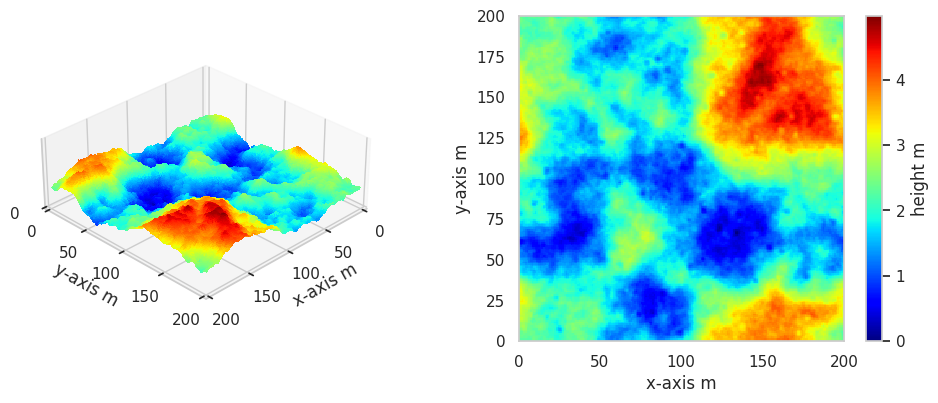

In [19]:
crater_prop = CraterProp(
    distribution="random", # types of crater distribution in the map
    geometry="normal", # geometry characteristic
    min_D=1, # minimum crater range
    max_D=5, # maximum crater range
)

param = Param(
    n=200, # number of grid in one axis
    res=1, # grid resolution [m]
    re=0.8, # roughness exponent for fractal surface (0 < re < 1)
    sigma=10, # amplitude gain for fractal surface
    is_fractal=True, # choose to apply fractal surface
    is_crater=True, # choose to apply crater shape
    crater_prop=crater_prop # crater proporty denoted as "CraterProp" data structure
)

grid_map = SurfaceModel(param=param)
grid_map.set_terrain_env()

grid_map.plot_maps()
plt.show()